# Persistent homology of activations

In this notebook we will show how the layers of a neural network trained on a classifiction task transforms the input data cloud.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from gdeep.neural_nets import sample_nn

from sklearn import datasets

In [20]:
# Create labeled point cloud data

n_samples = 1000

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.3,
                                    noise=.05)


X = noisy_circles[0]
y = noisy_circles[1]

# Tranform to torch.tensor

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

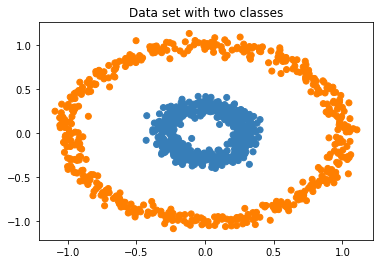

In [23]:
# Plot data set X, y

label_color = ['#377eb8' if lab else '#ff7f00' for lab in y.tolist()]

plt.scatter(X[:,0],X[:,1],
                color=label_color)

plt.title("Data set with two classes")
plt.show()

In [24]:
# Build NN
nodes_layer_1 = 32
dropout_p_layer_1 = 0.7
n_epochs = 2000
learning_rate = 0.01

nn_1 = sample_nn.SimpleNN(nodes_layer_1=nodes_layer_1, dropout_p=dropout_p_layer_1)